<a href="https://colab.research.google.com/github/Pratham2012/Python-for-Finance/blob/main/Exploring%20Mutual%20Fund%C2%A0Options.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from datetime import date,timedelta

# Load the data for the mutual fund and benchmark index fund
mf_ticker = "0P00005WF0.BO" #SBI Bluechip Fund Regular Growth 
benchmark_ticker = "^GSPC"  #S&P 500

# Date range
end = date.today()
start = end - timedelta(days=1000)

mf_data = yf.download(mf_ticker, start=start, end=end)
benchmark_data = yf.download(benchmark_ticker, start=start, end=end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
# Calculate the daily returns for the mutual fund and benchmark index fund
mf_returns = mf_data['Adj Close'].pct_change()
benchmark_returns = benchmark_data['Adj Close'].pct_change()

# Remove the first row which contains NaN values
mf_returns = mf_returns.dropna()
benchmark_returns = benchmark_returns.dropna()

In [ ]:
# Calculate the annualized return
mf_annual_return = mf_returns.mean() * 252
benchmark_annual_return = benchmark_returns.mean() * 252

# Calculate the annualized volatility
mf_annual_volatility = mf_returns.std() * np.sqrt(252)
benchmark_annual_volatility = benchmark_returns.std() * np.sqrt(252)

# Calculate the Sharpe ratio
mf_sharpe_ratio = (mf_annual_return - 0.02) / mf_annual_volatility
benchmark_sharpe_ratio = (benchmark_annual_return - 0.02) / benchmark_annual_volatility

# Calculate the maximum drawdown
mf_cum_returns = (1 + mf_returns).cumprod()
mf_max_drawdown = (mf_cum_returns / mf_cum_returns.cummax() - 1).min()

benchmark_cum_returns = (1 + benchmark_returns).cumprod()
benchmark_max_drawdown = (benchmark_cum_returns / benchmark_cum_returns.cummax() - 1).min()

In [ ]:
print("Mutual Fund Performance Metrics")
print(f"Annualized Return: {mf_annual_return:.2%}")
print(f"Annualized Volatility: {mf_annual_volatility:.2%}")
print(f"Sharpe Ratio: {mf_sharpe_ratio:.2f}")
print(f"Maximum Drawdown: {mf_max_drawdown:.2%}")
print()

print("Benchmark Performance Metrics")
print(f"Annualized Return: {benchmark_annual_return:.2%}")
print(f"Annualized Volatility: {benchmark_annual_volatility:.2%}")
print(f"Sharpe Ratio: {benchmark_sharpe_ratio:.2f}")
print(f"Maximum Drawdown: {benchmark_max_drawdown:.2%}")
print()

Mutual Fund Performance Metrics
Annualized Return: 17.72%
Annualized Volatility: 21.13%
Sharpe Ratio: 0.74
Maximum Drawdown: -37.17%

Benchmark Performance Metrics
Annualized Return: 20.39%
Annualized Volatility: 22.34%
Sharpe Ratio: 0.82
Maximum Drawdown: -33.92%



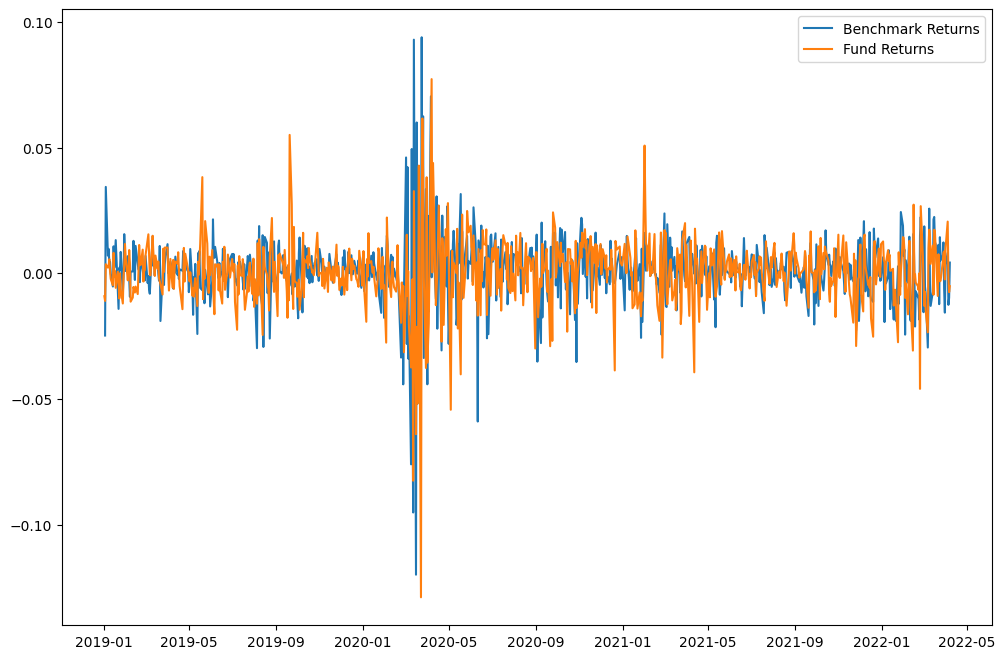

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.plot(benchmark_returns, label = "Benchmark Returns")
plt.plot(mf_returns,label="Fund Returns")
plt.legend()
# plt.figsize(12,8)
plt.show()